In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# London

In [367]:
london = pd.read_csv('/Users/vasilina/Downloads/london_df.csv')

In [368]:
london.info()
print('*'*20, 'Unique values for each column: ')
print(london.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844241 entries, 0 to 2844240
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   month                  object 
 2   reported by            object 
 3   longitude              float64
 4   latitude               float64
 5   location               object 
 6   lsoa code              int64  
 7   lsoa name              object 
 8   crime type             object 
 9   last outcome category  object 
 10  borough_london         object 
 11  stringency             float64
 12  covid                  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 282.1+ MB
******************** Unique values for each column: 
Unnamed: 0               2844241
month                         45
reported by                    2
longitude                  57443
latitude                   54565
location                   35221
lsoa code                   4831

In [369]:
print(london.apply(lambda col: col.unique()))

Unnamed: 0               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
month                    [2018-01, 2018-02, 2018-03, 2018-04, 2018-05, ...
reported by              [Metropolitan Police Service, City of London P...
longitude                [0.140035, 0.135554, 0.137065, 0.134947, 0.140...
latitude                 [51.589112, 51.584985, 51.583672, 51.588063, 5...
location                 [On or near Beansland Grove, On or near Rose L...
lsoa code                [1000027, 1000028, 1000029, 1000030, 1000031, ...
lsoa name                [Barking and Dagenham 001A, Barking and Dagenh...
crime type               [Burglary, Criminal damage and arson, Other th...
last outcome category    [Offender sent to prison, Investigation comple...
borough_london           [Barking and Dagenham, Barnet, Bexley, Brent, ...
stringency               [0.0, 37.484, 79.63, 74.045, 70.97896552, 65.1...
covid                                                               [0, 1]
dtype: object


In [370]:
# as the outcome and crime type have many categories we have to combine some to use 
#one hot encoding

london['last outcome category'].value_counts()

Investigation complete; no suspect identified          1356572
Status update unavailable                              1046897
Under investigation                                     143068
Court result unavailable                                 99324
Local resolution                                         91980
Offender given a caution                                 25713
Offender given penalty notice                            20177
Awaiting court outcome                                   19965
Offender sent to prison                                   6281
Offender given a drugs possession warning                 6044
Offender given community sentence                         5847
Defendant found not guilty                                5058
Offender fined                                            4777
Court case unable to proceed                              3366
Offender given suspended prison sentence                  2542
Unable to prosecute suspect                            

In [371]:
# checking for all the unique values 
london['crime type'].value_counts()

Violence and sexual offences    748624
Vehicle crime                   404401
Other theft                     379307
Burglary                        256946
Criminal damage and arson       194401
Public order                    176016
Drugs                           156308
Theft from the person           149070
Shoplifting                     143337
Robbery                         104628
Bicycle theft                    77879
Other crime                      34046
Possession of weapons            19278
Name: crime type, dtype: int64

In [554]:
london['crime type'].nunique()

13

<AxesSubplot:xlabel='count', ylabel='last outcome category'>

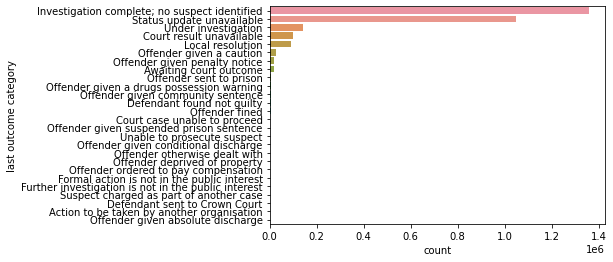

In [372]:
fig=plt.plot(figsize=(15,12), dpi=200)
sns.countplot(y='last outcome category', data=london, order=london['last outcome category'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='crime type'>

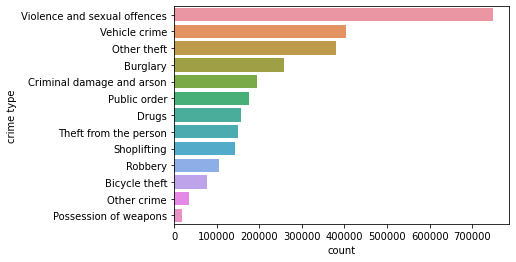

In [373]:
sns.countplot(y='crime type', data=london, order=london['crime type'].value_counts().index)

In [374]:
# replace these with 'suspect present;action taken'
replace_other = [
    'Local resolution', 'Offender given a caution', 'Offender sent to prison',
    'Offender given community sentence', 'Offender given penalty notice',
    'Defendant found not guilty', 'Offender given a drugs possession warning',
    'Offender fined', 'Court case unable to proceed',
    'Offender given suspended prison sentence',
    'Offender given conditional discharge', 'Unable to prosecute suspect',
    'Offender otherwise dealt with', 'Offender deprived of property',
    'Offender ordered to pay compensation', 'Awaiting court outcome',
    'Further investigation is not in the public interest',
    'Defendant sent to Crown Court',
    'Formal action is not in the public interest',
    'Suspect charged as part of another case',
    'Offender given absolute discharge', 'Under investigation',
    'Action to be taken by another organisation'
]
london['last outcome category'] = london['last outcome category'].replace(
    replace_other, 'suspect present; action taken')
london['last outcome category'] = london['last outcome category'].replace(
    'Court result unavailable', 'Status update unavailable')

london

,Unnamed: 0,month,reported by,longitude,latitude,location,lsoa code,lsoa name,crime type,last outcome category,borough_london,stringency,covid
0,0,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,suspect present; action taken,Barking and Dagenham,0.000,0
1,1,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Investigation complete; no suspect identified,Barking and Dagenham,0.000,0
2,2,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.000,0
3,3,2018-01,Metropolitan Police Service,0.140035,51.589112,On or near Beansland Grove,1000027,Barking and Dagenham 001A,Burglary,Status update unavailable,Barking and Dagenham,0.000,0
4,4,2018-01,Metropolitan Police Service,0.135554,51.584985,On or near Rose Lane,1000027,Barking and Dagenham 001A,Criminal damage and arson,Investigation complete; no suspect identified,Barking and Dagenham,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,2844236,2021-09,Metropolitan Police Service,-0.135532,51.489097,On or near St George'S Square,1004741,Westminster 024F,Theft from the person,Investigation complete; no suspect identified,Westminster,42.034,1
2844237,2844237,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Theft from the person,suspect present; action taken,Westminster,42.034,1
2844238,2844238,2021-09,Metropolitan Police Service,-0.133400,51.489117,On or near Bessborough Street,1004741,Westminster 024F,Violence and sexual offences,suspect present; action taken,Westminster,42.034,1
2844239,2844239,2021-09,Metropolitan Police Service,-0.134389,51.488872,On or near Lupus Street,1004741,Westminster 024F,Violence and sexual offences,suspect present; action taken,Westminster,42.034,1


In [375]:
# borough, lsoa name, and location are represented by lsoa code so we drop them
cols = ['borough_london', 'lsoa name', 'location', 'reported by']
london = london.drop(cols, axis=1)

In [376]:
# ohe the two categorical cols
cat_cols = ['last outcome category', 'crime type']
london_ohe = pd.get_dummies(london, columns=cat_cols)
#ondon_ohe = pd.concat([london, ohe], axis=1)
print(type(london_ohe))

<class 'pandas.core.frame.DataFrame'>


In [377]:
london_ohe.columns

Index(['Unnamed: 0', 'month', 'longitude', 'latitude', 'lsoa code',
       'stringency', 'covid',
       'last outcome category_Investigation complete; no suspect identified',
       'last outcome category_Status update unavailable',
       'last outcome category_suspect present; action taken',
       'crime type_Bicycle theft', 'crime type_Burglary',
       'crime type_Criminal damage and arson', 'crime type_Drugs',
       'crime type_Other crime', 'crime type_Other theft',
       'crime type_Possession of weapons', 'crime type_Public order',
       'crime type_Robbery', 'crime type_Shoplifting',
       'crime type_Theft from the person', 'crime type_Vehicle crime',
       'crime type_Violence and sexual offences'],
      dtype='object')

In [378]:
# dropping index 
london_ohe = london_ohe.iloc[:,1:]
#london_ohe = london_ohe.drop(columns=['last outcome category', 'crime type'], axis=1)
print(london_ohe.shape)
london_ohe

(2844241, 22)


,month,longitude,latitude,lsoa code,stringency,covid,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present; action taken,crime type_Bicycle theft,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,2018-01,0.140035,51.589112,1000027,0.000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-01,0.140035,51.589112,1000027,0.000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2018-01,0.135554,51.584985,1000027,0.000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018-01,0.140035,51.589112,1000027,0.000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018-01,0.135554,51.584985,1000027,0.000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,2021-09,-0.135532,51.489097,1004741,42.034,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2844237,2021-09,-0.134389,51.488872,1004741,42.034,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2844238,2021-09,-0.133400,51.489117,1004741,42.034,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2844239,2021-09,-0.134389,51.488872,1004741,42.034,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [379]:
# save 
london_ohe.to_csv('/Users/vasilina/Downloads/london_ohe.csv')

# London adding crime count

In [395]:
# adding a crime count column
london['month'] = pd.to_datetime(london['month'])
#df = other5.groupby(pd.Grouper(freq='M', key='date').sum())
collapsed_london = london.groupby(pd.Grouper(freq='M', key='month'))['crime type'].count()

In [396]:
collapsed_london = collapsed_london.to_frame()

In [397]:
collapsed_london['month'] = collapsed_london.index
collapsed_london.index = range(0,len(collapsed_london))

In [398]:
collapsed_london['month'] = collapsed_london['month'].astype(str).str[:-3]
print(collapsed_london)

    crime type    month
0        64679  2018-01
1        58614  2018-02
2        62817  2018-03
3        62269  2018-04
4        66002  2018-05
5        65393  2018-06
6        69301  2018-07
7        64528  2018-08
8        64272  2018-09
9        69389  2018-10
10       69703  2018-11
11       66738  2018-12
12       67773  2019-01
13       65877  2019-02
14       73572  2019-03
15       67977  2019-04
16       70383  2019-05
17       69736  2019-06
18       69256  2019-07
19       63895  2019-08
20       63326  2019-09
21       71543  2019-10
22       68776  2019-11
23       65919  2019-12
24       69864  2020-01
25       66466  2020-02
26       60812  2020-03
27       44265  2020-04
28       51756  2020-05
29       56526  2020-06
30       63679  2020-07
31       64580  2020-08
32       64442  2020-09
33       64270  2020-10
34       59213  2020-11
35       55122  2020-12
36       47958  2021-01
37       47535  2021-02
38       56772  2021-03
39       55805  2021-04
40       61347  

In [399]:
print(london.info())
london['month'] = london['month'].apply(lambda x: x.strftime('%Y-%m'))
print(london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844241 entries, 0 to 2844240
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Unnamed: 0             int64         
 1   month                  datetime64[ns]
 2   longitude              float64       
 3   latitude               float64       
 4   lsoa code              int64         
 5   crime type             object        
 6   last outcome category  object        
 7   stringency             float64       
 8   covid                  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 195.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844241 entries, 0 to 2844240
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   month                  object 
 2   longitude              float64
 3   latitude               float64

In [400]:
# merge with original dataset 
merged_london = collapsed_london.merge(london_ohe, left_on='month', right_on='month')
merged_london.head(10)

,crime type,month,longitude,latitude,lsoa code,stringency,covid,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present; action taken,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,64679,2018-01,0.140035,51.589112,1000027,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,64679,2018-01,0.140035,51.589112,1000027,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64679,2018-01,0.135554,51.584985,1000027,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,64679,2018-01,0.140035,51.589112,1000027,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,64679,2018-01,0.135554,51.584985,1000027,0.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,64679,2018-01,0.137065,51.583672,1000027,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,64679,2018-01,0.134947,51.588063,1000027,0.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7,64679,2018-01,0.134947,51.588063,1000027,0.0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8,64679,2018-01,0.140634,51.583427,1000027,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,64679,2018-01,0.140035,51.589112,1000027,0.0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [401]:
merged_london.columns

Index(['crime type', 'month', 'longitude', 'latitude', 'lsoa code',
       'stringency', 'covid',
       'last outcome category_Investigation complete; no suspect identified',
       'last outcome category_Status update unavailable',
       'last outcome category_suspect present; action taken',
       'crime type_Bicycle theft', 'crime type_Burglary',
       'crime type_Criminal damage and arson', 'crime type_Drugs',
       'crime type_Other crime', 'crime type_Other theft',
       'crime type_Possession of weapons', 'crime type_Public order',
       'crime type_Robbery', 'crime type_Shoplifting',
       'crime type_Theft from the person', 'crime type_Vehicle crime',
       'crime type_Violence and sexual offences'],
      dtype='object')

In [402]:
merged_london = merged_london.rename(columns={'crime type':'crimes count'})
merged_london

,crimes count,month,longitude,latitude,lsoa code,stringency,covid,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present; action taken,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,64679,2018-01,0.140035,51.589112,1000027,0.000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,64679,2018-01,0.140035,51.589112,1000027,0.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,64679,2018-01,0.135554,51.584985,1000027,0.000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,64679,2018-01,0.140035,51.589112,1000027,0.000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,64679,2018-01,0.135554,51.584985,1000027,0.000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844236,63895,2021-09,-0.135532,51.489097,1004741,42.034,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2844237,63895,2021-09,-0.134389,51.488872,1004741,42.034,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2844238,63895,2021-09,-0.133400,51.489117,1004741,42.034,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2844239,63895,2021-09,-0.134389,51.488872,1004741,42.034,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [442]:
last_column1 = merged_london.pop('crimes count')
merged_london.insert(22, 'crimes count', last_column1)
#print(merged_london)

In [ ]:
# save to csv
merged_london.to_csv('/Users/vasilina/Downloads/london_ohe.csv', index=False)

# Other 5 cities

In [520]:
# following same steps for all other cities
other5 = pd.read_csv('/Users/vasilina/Downloads/other_cities_df.csv')

In [521]:
other5.info()
print('*'*20, 'Unique values for each column: ')
print(other5.nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220535 entries, 0 to 1220534
Data columns (total 13 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1220535 non-null  int64  
 1   month                  1220535 non-null  object 
 2   reported by            1220535 non-null  object 
 3   longitude              1220535 non-null  float64
 4   latitude               1220535 non-null  float64
 5   location               1220535 non-null  object 
 6   lsoa code              1220535 non-null  int64  
 7   lsoa name              1220535 non-null  object 
 8   crime type             1220535 non-null  object 
 9   last outcome category  1220535 non-null  object 
 10  covid                  1220535 non-null  int64  
 11  date                   1220535 non-null  object 
 12  stringency             1220535 non-null  float64
dtypes: float64(3), int64(3), object(7)
memory usage: 121.1+ MB
*************

In [522]:
other5['last outcome category'].value_counts()

Investigation complete; no suspect identified          446329
Unable to prosecute suspect                            445888
Status update unavailable                              135133
Court result unavailable                                64817
Under investigation                                     24285
Local resolution                                        24043
Awaiting court outcome                                  13094
Further investigation is not in the public interest     11781
Offender given a caution                                11653
Action to be taken by another organisation               7703
Further action is not in the public interest             6653
Formal action is not in the public interest              6131
Offender given a drugs possession warning                4809
Offender sent to prison                                  3964
Offender given community sentence                        3451
Defendant found not guilty                               2081
Offender

In [523]:
other5['crime type'].value_counts()

Violence and sexual offences    463991
Public order                    139385
Criminal damage and arson       129031
Other theft                      94682
Vehicle crime                    92373
Burglary                         91292
Shoplifting                      70628
Drugs                            49485
Other crime                      28174
Theft from the person            18043
Bicycle theft                    16658
Robbery                          16012
Possession of weapons            10781
Name: crime type, dtype: int64

In [553]:
other5['crime type'].nunique()

13

In [524]:
# borough, lsoa name, location are represented by lsoa code so we drop them
cols = ['date', 'lsoa name', 'location', 'reported by']
other5 = other5.drop(cols, axis=1)

<AxesSubplot:xlabel='count', ylabel='last outcome category'>

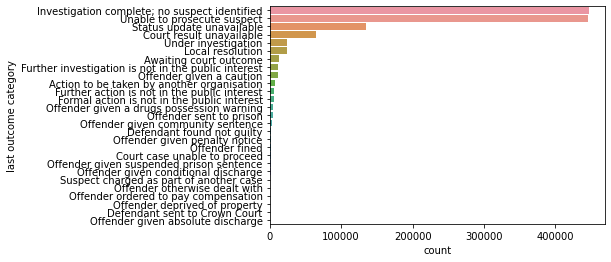

In [525]:
fig=plt.plot(figsize=(15,12), dpi=200)
sns.countplot(y='last outcome category', data=other5, order=other5['last outcome category'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='crime type'>

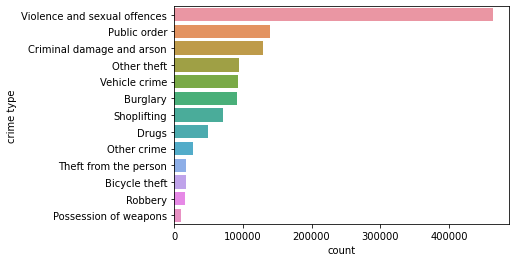

In [526]:
sns.countplot(y='crime type', data=other5, order=other5['crime type'].value_counts().index)

In [527]:
replace_other = ['Local resolution','Further action is not in the public interest', 'Offender given a caution', 'Offender sent to prison', 'Offender given community sentence', 'Offender given penalty notice', 'Defendant found not guilty', 'Offender given a drugs possession warning', 'Offender fined', 'Court case unable to proceed', 'Offender given suspended prison sentence', 'Offender given conditional discharge', 'Unable to prosecute suspect', 'Offender otherwise dealt with', 'Offender deprived of property', 'Offender ordered to pay compensation', 'Awaiting court outcome', 'Further investigation is not in the public interest', 'Defendant sent to Crown Court', 'Formal action is not in the public interest', 'Suspect charged as part of another case', 'Offender given absolute discharge', 'Under investigation', 'Action to be taken by another organisation']
other5['last outcome category'] = other5['last outcome category'].replace(replace_other, 'suspect present or action taken')
other5['last outcome category'] = other5['last outcome category'].replace('Court result unavailable', 'Status update unavailable')

other5

,Unnamed: 0,month,longitude,latitude,lsoa code,crime type,last outcome category,covid,stringency
0,0,2018-01,-1.388671,53.935321,1011698,Criminal damage and arson,Investigation complete; no suspect identified,0,0.000
1,1,2018-01,-1.391328,53.938003,1011698,Shoplifting,Investigation complete; no suspect identified,0,0.000
2,2,2018-01,-1.388828,53.936031,1011698,Vehicle crime,Investigation complete; no suspect identified,0,0.000
3,3,2018-01,-1.391328,53.938003,1011698,Violence and sexual offences,suspect present or action taken,0,0.000
4,4,2018-01,-1.389567,53.938615,1011698,Violence and sexual offences,suspect present or action taken,0,0.000
...,...,...,...,...,...,...,...,...,...
1220530,1220530,2021-09,-2.560748,51.472315,1014574,Violence and sexual offences,suspect present or action taken,1,42.034
1220531,1220531,2021-09,-2.560484,51.473152,1014574,Violence and sexual offences,suspect present or action taken,1,42.034
1220532,1220532,2021-09,-2.559442,51.472717,1014574,Violence and sexual offences,suspect present or action taken,1,42.034
1220533,1220533,2021-09,-2.560748,51.472315,1014574,Violence and sexual offences,suspect present or action taken,1,42.034


In [528]:
# ohe the two categorical cols
cat_cols2 = ['last outcome category', 'crime type']
other_ohe = pd.get_dummies(other5, columns=cat_cols2)
#print(type(other_ohe))
other_ohe

,Unnamed: 0,month,longitude,latitude,lsoa code,covid,stringency,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present or action taken,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,0,2018-01,-1.388671,53.935321,1011698,0,0.000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2018-01,-1.391328,53.938003,1011698,0,0.000,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2018-01,-1.388828,53.936031,1011698,0,0.000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,2018-01,-1.391328,53.938003,1011698,0,0.000,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,4,2018-01,-1.389567,53.938615,1011698,0,0.000,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220530,1220530,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1220531,1220531,2021-09,-2.560484,51.473152,1014574,1,42.034,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1220532,1220532,2021-09,-2.559442,51.472717,1014574,1,42.034,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1220533,1220533,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [517]:
other5

,Unnamed: 0,month,longitude,latitude,lsoa code,covid,stringency,last outcome category_Further action is not in the public interest,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,0,2018-01,-1.388671,53.935321,1011698,0,0.000,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2018-01,-1.391328,53.938003,1011698,0,0.000,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2,2018-01,-1.388828,53.936031,1011698,0,0.000,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,3,2018-01,-1.391328,53.938003,1011698,0,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,2018-01,-1.389567,53.938615,1011698,0,0.000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220530,1220530,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1220531,1220531,2021-09,-2.560484,51.473152,1014574,1,42.034,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1220532,1220532,2021-09,-2.559442,51.472717,1014574,1,42.034,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1220533,1220533,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [501]:
other_ohe.columns

Index(['month', 'longitude', 'latitude', 'lsoa code', 'covid', 'stringency',
       'last outcome category_Further action is not in the public interest',
       'last outcome category_Investigation complete; no suspect identified',
       'last outcome category_Status update unavailable',
       'last outcome category_suspect present or action taken',
       'crime type_Bicycle theft', 'crime type_Burglary',
       'crime type_Criminal damage and arson', 'crime type_Drugs',
       'crime type_Other crime', 'crime type_Other theft',
       'crime type_Possession of weapons', 'crime type_Public order',
       'crime type_Robbery', 'crime type_Shoplifting',
       'crime type_Theft from the person', 'crime type_Vehicle crime',
       'crime type_Violence and sexual offences'],
      dtype='object')

In [529]:
# dropping index 
other_ohe = other_ohe.iloc[:,1:]
#london_ohe = london_ohe.drop(columns=['last outcome category', 'crime type'], axis=1)
print(other_ohe.shape)
other_ohe

(1220535, 22)


,month,longitude,latitude,lsoa code,covid,stringency,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present or action taken,crime type_Bicycle theft,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,2018-01,-1.388671,53.935321,1011698,0,0.000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018-01,-1.391328,53.938003,1011698,0,0.000,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,2018-01,-1.388828,53.936031,1011698,0,0.000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2018-01,-1.391328,53.938003,1011698,0,0.000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,2018-01,-1.389567,53.938615,1011698,0,0.000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220530,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1220531,2021-09,-2.560484,51.473152,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1220532,2021-09,-2.559442,51.472717,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1220533,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [530]:
#other_ohe.to_csv('/Users/vasilina/Downloads/other_ohe.csv')

# Other: adding crime count column

In [531]:
other5['month'] = pd.to_datetime(other5['month'])
#df = other5.groupby(pd.Grouper(freq='M', key='date').sum())
collapsed = other5.groupby(pd.Grouper(freq='M', key='month'))['crime type'].count()

In [532]:
collapsed = collapsed.to_frame()

In [533]:
collapsed['month'] = collapsed.index
collapsed.index = range(0,len(collapsed))

In [534]:
collapsed['month'] = collapsed['month'].astype(str).str[:-3]
print(collapsed)

    crime type    month
0        26435  2018-01
1        24050  2018-02
2        26916  2018-03
3        27266  2018-04
4        29216  2018-05
5        27819  2018-06
6        29275  2018-07
7        28461  2018-08
8        27937  2018-09
9        29757  2018-10
10       28698  2018-11
11       26971  2018-12
12       27435  2019-01
13       25086  2019-02
14       28406  2019-03
15       27266  2019-04
16       27983  2019-05
17       27248  2019-06
18       29115  2019-07
19       28043  2019-08
20       27574  2019-09
21       29451  2019-10
22       28786  2019-11
23       27649  2019-12
24       28313  2020-01
25       26366  2020-02
26       26174  2020-03
27       20758  2020-04
28       23219  2020-05
29       24796  2020-06
30       27918  2020-07
31       28128  2020-08
32       26779  2020-09
33       26750  2020-10
34       25444  2020-11
35       23877  2020-12
36       22812  2021-01
37       21851  2021-02
38       26366  2021-03
39       26022  2021-04
40       28379  

In [535]:
print(other5.info())
other5['month'] = other5['month'].apply(lambda x: x.strftime('%Y-%m'))
print(other5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220535 entries, 0 to 1220534
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1220535 non-null  int64         
 1   month                  1220535 non-null  datetime64[ns]
 2   longitude              1220535 non-null  float64       
 3   latitude               1220535 non-null  float64       
 4   lsoa code              1220535 non-null  int64         
 5   crime type             1220535 non-null  object        
 6   last outcome category  1220535 non-null  object        
 7   covid                  1220535 non-null  int64         
 8   stringency             1220535 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 83.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220535 entries, 0 to 1220534
Data columns (total 9 columns):
 #   Column       

In [547]:
# merge with original dataset 
merged = collapsed.merge(other_ohe, left_on='month', right_on='month')
merged.head(10)

,crime type,month,longitude,latitude,lsoa code,covid,stringency,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present or action taken,...,crime type_Drugs,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences
0,26435,2018-01,-1.388671,53.935321,1011698,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,26435,2018-01,-1.391328,53.938003,1011698,0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,26435,2018-01,-1.388828,53.936031,1011698,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,26435,2018-01,-1.391328,53.938003,1011698,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,26435,2018-01,-1.389567,53.938615,1011698,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,26435,2018-01,-1.389025,53.934028,1011698,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,26435,2018-01,-1.386450,53.941340,1011699,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,26435,2018-01,-1.396755,53.939828,1011699,0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,26435,2018-01,-1.385028,53.935473,1011701,0,0.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,26435,2018-01,-1.385655,53.933247,1011701,0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [548]:
merged.columns

Index(['crime type', 'month', 'longitude', 'latitude', 'lsoa code', 'covid',
       'stringency',
       'last outcome category_Investigation complete; no suspect identified',
       'last outcome category_Status update unavailable',
       'last outcome category_suspect present or action taken',
       'crime type_Bicycle theft', 'crime type_Burglary',
       'crime type_Criminal damage and arson', 'crime type_Drugs',
       'crime type_Other crime', 'crime type_Other theft',
       'crime type_Possession of weapons', 'crime type_Public order',
       'crime type_Robbery', 'crime type_Shoplifting',
       'crime type_Theft from the person', 'crime type_Vehicle crime',
       'crime type_Violence and sexual offences'],
      dtype='object')

In [549]:
merged = merged.rename(columns={'crime type':'crimes count'})

In [550]:
# adding crime count col to end of df
last_column = merged.pop('crimes count')
merged.insert(22, 'crimes count', last_column)

# save to csv
merged.to_csv('/Users/vasilina/Downloads/other_ohe.csv', index=0)

In [551]:
merged

,month,longitude,latitude,lsoa code,covid,stringency,last outcome category_Investigation complete; no suspect identified,last outcome category_Status update unavailable,last outcome category_suspect present or action taken,crime type_Bicycle theft,...,crime type_Other crime,crime type_Other theft,crime type_Possession of weapons,crime type_Public order,crime type_Robbery,crime type_Shoplifting,crime type_Theft from the person,crime type_Vehicle crime,crime type_Violence and sexual offences,crimes count
0,2018-01,-1.388671,53.935321,1011698,0,0.000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,26435
1,2018-01,-1.391328,53.938003,1011698,0,0.000,1,0,0,0,...,0,0,0,0,0,1,0,0,0,26435
2,2018-01,-1.388828,53.936031,1011698,0,0.000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,26435
3,2018-01,-1.391328,53.938003,1011698,0,0.000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,26435
4,2018-01,-1.389567,53.938615,1011698,0,0.000,0,0,1,0,...,0,0,0,0,0,0,0,0,1,26435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1220530,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,1,29961
1220531,2021-09,-2.560484,51.473152,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,1,29961
1220532,2021-09,-2.559442,51.472717,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,1,29961
1220533,2021-09,-2.560748,51.472315,1014574,1,42.034,0,0,1,0,...,0,0,0,0,0,0,0,0,1,29961
